## Metrica para usar en algoritmos de Clasificacion -> En este caso Binaria

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
)

In [3]:

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

df = poblacion_india_df.loc[:, ["glucose", "bmi", "age", "pregnancies","outcome"]]

In [7]:
target = 'outcome'
X = df.drop(target, axis=1)
y = df[target]

In [11]:
# Scaling para usar las medidas base de las originales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [17]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [21]:
print("=== MÉTRICAS DE CLASIFICACIÓN ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")

=== MÉTRICAS DE CLASIFICACIÓN ===
Accuracy: 0.7078
Precision: 0.5918
Recall: 0.5370
F1-Score: 0.5631
ROC-AUC: 0.6685


In [24]:
print("\nReporte")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))


Reporte
              precision    recall  f1-score   support

 No Diabetes       0.76      0.80      0.78       100
    Diabetes       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154



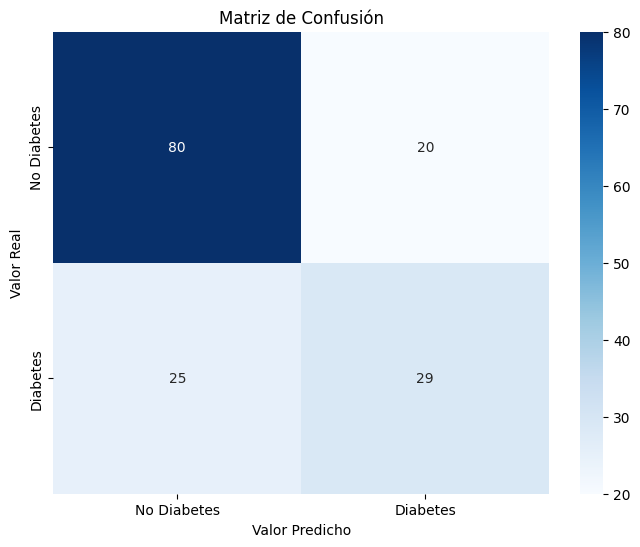


=== ANÁLISIS MATRIZ DE CONFUSIÓN ===
Verdaderos Negativos: 80
Falsos Positivos: 20
Falsos Negativos: 25
Verdaderos Positivos: 29
Tasa de Falsos Positivos: 0.2000
Tasa de Falsos Negativos: 0.4630


In [28]:
# 3. MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Métricas derivadas de la matriz de confusión
tn, fp, fn, tp = cm.ravel()
print(f"\n=== ANÁLISIS MATRIZ DE CONFUSIÓN ===")
print(f"Verdaderos Negativos: {tn}")
print(f"Falsos Positivos: {fp}")
print(f"Falsos Negativos: {fn}")
print(f"Verdaderos Positivos: {tp}")
print(f"Tasa de Falsos Positivos: {fp/(fp+tn):.4f}")
print(f"Tasa de Falsos Negativos: {fn/(fn+tp):.4f}")

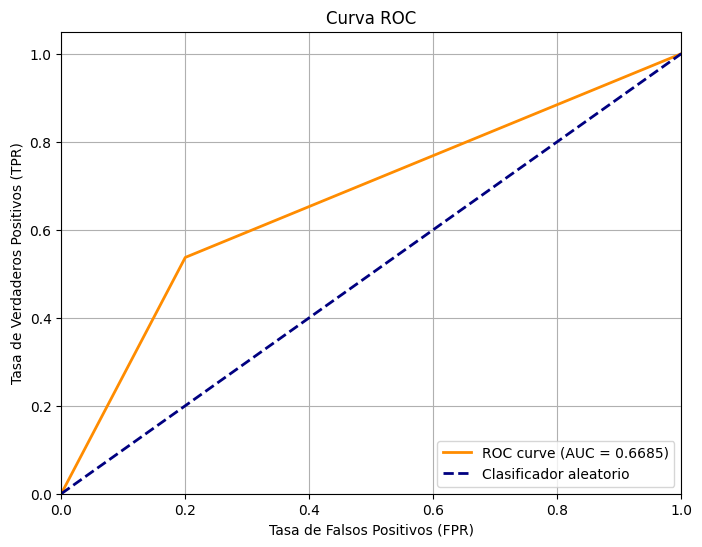

AUC-ROC: 0.6685


In [32]:
# 4. CURVA ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC-ROC: {roc_auc:.4f}")

In [36]:
from sklearn.metrics import cohen_kappa_score, log_loss, matthews_corrcoef

In [38]:
# 7. RESUMEN COMPACTO
print("Reporte Simple a Negocio")
metrics_summary = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test, y_pred),
    'Matthews Corr': matthews_corrcoef(y_test, y_pred)
}

for metric, value in metrics_summary.items():
    print(f"{metric}: {value:.4f}")

Reporte Simple a Negocio
Accuracy: 0.7078
Precision: 0.5918
Recall: 0.5370
F1-Score: 0.5631
ROC-AUC: 0.6685
Cohen Kappa: 0.3444
Matthews Corr: 0.3453


## RESUMEN E INTERPRETACIÓN DE MÉTRICAS DE CLASIFICACIÓN

### EVALUACIÓN GENERAL DEL MODELO

El modelo muestra un rendimiento **moderado-bajo** en la tarea de clasificación, con un accuracy del 70.8% pero métricas de clasificación binaria que indican limitaciones significativas.

### ANÁLISIS DETALLADO POR MÉTRICA

**ACCURACY (EXACTITUD): 0.7078**
- El modelo clasifica correctamente el 70.78% de las instancias
- Esta métrica puede ser engañosa si las clases están desbalanceadas
- Valor aceptable pero no excelente

**PRECISION (PRECISIÓN): 0.5918**
- Cuando el modelo predice la clase positiva, está en lo correcto el 59.18% de las veces
- Indica un problema con falsos positivos: aproximadamente 4 de cada 10 predicciones positivas son incorrectas
- Valor moderadamente bajo que sugiere que el modelo no es muy confiable cuando predice la clase positiva

**RECALL (SENSIBILIDAD): 0.5370**
- El modelo detecta solo el 53.70% de los casos positivos reales
- Problema significativo con falsos negativos: casi la mitad de los casos positivos reales no son identificados
- Valor bajo que indica dificultad para capturar la clase positiva

**F1-SCORE: 0.5631**
- Media armónica entre precision y recall
- Valor bajo que refleja el equilibrio pobre entre ambas métricas
- Confirma que el modelo tiene dificultades tanto con falsos positivos como con falsos negativos

**ROC-AUC: 0.6685**
- Capacidad del modelo para distinguir entre clases
- Valor por debajo de 0.7 indica poder discriminativo limitado
- El modelo es mejor que aleatorio pero no sustancialmente mejor

**COHEN'S KAPPA: 0.3444**
- Acuerdo entre predicciones y valores reales, corrigiendo el azar
- Valor entre 0.20-0.40 indica acuerdo "ligero" según la escala de Landis y Koch
- El modelo supera solo ligeramente lo esperado por azar

**MATTHEWS CORRELATION: 0.3453**
- Medida robusta para problemas con clases desbalanceadas
- Valor similar a Kappa confirma el rendimiento moderado-bajo
- Correlación débil entre predicciones y valores reales

### INTERPRETACIÓN PARA NEGOCIO

**FORTALEZAS:**
- Exactitud general del 70.8% puede ser aceptable para aplicaciones no críticas
- Mejor que un clasificador aleatorio

**DEBILIDADES CRÍTICAS:**
- Baja capacidad para detectar casos positivos (recall del 53.7%)
- Alta tasa de falsas alarmas cuando predice positivo (precision del 59.2%)
- Poder discriminativo limitado entre clases

**RECOMENDACIONES:**
1. Evaluar el balance de clases en el dataset
2. Considerar ajustar el umbral de clasificación para mejorar recall o precision según la aplicación
3. Explorar técnicas para manejo de clases desbalanceadas si aplica
4. Investigar feature engineering o modelos alternativos para mejorar la capacidad predictiva

El modelo puede ser útil para screening inicial pero requiere validación humana para decisiones críticas, dado su alto porcentaje de errores en la clase positiva.

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced'  # Maneja desbalance de clases
)


rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [56]:
print("Reporte Simple a Negocio")
metrics_summary = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test, y_pred),
    'Matthews Corr': matthews_corrcoef(y_test, y_pred)
}

for metric, value in metrics_summary.items():
    print(f"{metric}: {value:.4f}")

Reporte Simple a Negocio
Accuracy: 0.7468
Precision: 0.6154
Recall: 0.7407
F1-Score: 0.6723
ROC-AUC: 0.7454
Cohen Kappa: 0.4688
Matthews Corr: 0.4741
